# tree계열 이외의 분류 알고리즘

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

In [2]:
mem = pd.read_csv("./data/member.csv")
tran = pd.read_csv("./data/transaction.csv")

In [3]:
mem.head()

,id,recency,zip_code,is_referral,channel,conversion
0,906145,10,Surburban,0,Phone,0
1,184478,6,Rural,1,Web,0
2,394235,7,Surburban,1,Web,0
3,130152,9,Rural,1,Web,0
4,940352,2,Urban,0,Web,0


In [4]:
tran.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
4,394235,4,33000


In [5]:
mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           64000 non-null  int64 
 1   recency      64000 non-null  int64 
 2   zip_code     64000 non-null  object
 3   is_referral  64000 non-null  int64 
 4   channel      64000 non-null  object
 5   conversion   64000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


In [6]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196836 entries, 0 to 196835
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   id            196836 non-null  int64
 1   num_item      196836 non-null  int64
 2   total_amount  196836 non-null  int64
dtypes: int64(3)
memory usage: 4.5 MB


In [7]:
mem['id'].nunique()

64000

In [8]:
tran['id'].nunique()

64000

* 쇼핑몰 고객 데이터, 프로모션 쿠폰을 발행하고 사용 여부 데이터 수집
* mem : 고객id, 최근 방문일, 사는 지역, 추천여부, 주요접속체널, 쿠폰사용여부(target)
* tran : 고객id, 구매수량, 총 구매금액
* 전통적 마케팅 분석 방법 RFM 기법을 활용해 고객 데이터에서 파생변수 생성 후 분석
* R: Recency: 현재일 - 최근 구매일
* F: Frequency: 구매빈도
* M: Monetary: 구매 금액
* 종속변수: conversion => 고객이 프로모션에 반응 했는가? 1 =yes, 0 = no

In [9]:
from ydata_profiling import ProfileReport

In [10]:
for name, df in zip(['mem', 'tran'], [mem, tran]):
    profile = ProfileReport(df, title=f"{name} EDA", explorative=True)
    profile.to_file(f"./data/{name}_eda_report.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 181.36it/s]


In [11]:
from sklearn.model_selection import train_test_split

In [14]:
mem_train, mem_test = train_test_split(mem, test_size=0.4, random_state=42, stratify=mem['conversion'])
mem_train.head()
mem_train['id'].nunique()

38400

In [18]:
tran_train = tran[tran['id'].isin(mem_train['id'])]
print(len(tran_train), mem_train['id'].nunique(), tran_train['id'].nunique())
tran_test = tran[~tran['id'].isin(mem_train['id'])]
print(len(tran_test), mem_test['id'].nunique(), tran_test['id'].nunique())

118167 38400 38400
78669 25600 25600


In [19]:
mem_test.to_csv("./data/member_test.csv", index=False)
tran_test.to_csv("./data/transaction_test.csv", index=False)

문자 컬럼과 숫자컬럼 분리 후 EDA

In [20]:
mem_train.columns

Index(['id', 'recency', 'zip_code', 'is_referral', 'channel', 'conversion'], dtype='object')

In [22]:
num_cols = mem_train[['recency']].columns
cat_cols = mem_train[['zip_code', 'is_referral', 'channel', 'conversion']].columns
print(num_cols)
print(cat_cols)

Index(['recency'], dtype='object')
Index(['zip_code', 'is_referral', 'channel', 'conversion'], dtype='object')


============================== recency ==============================


count    38400.000000
mean         5.756224
std          3.506353
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         12.000000
Name: recency, dtype: float64

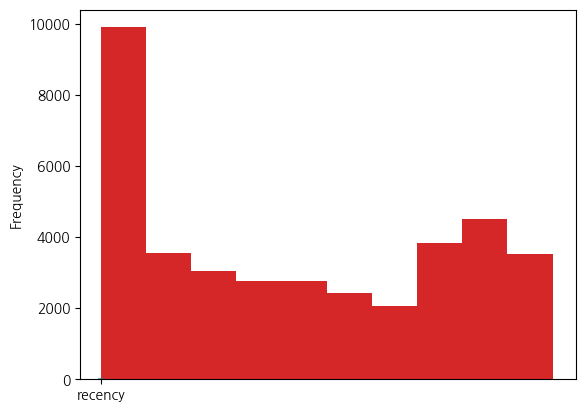

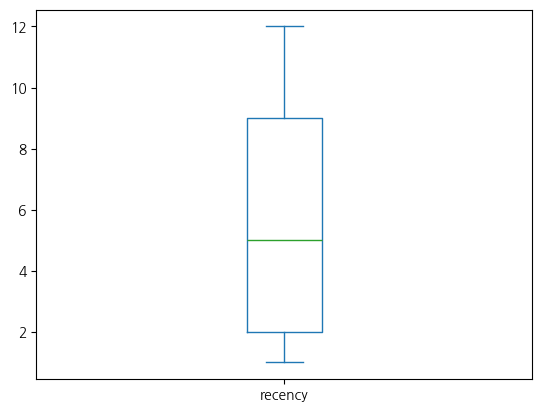

,conversion
recency,
1,0.191776
2,0.177582
3,0.169291
4,0.149852
5,0.142857
6,0.141312
7,0.136175
8,0.127229
12,0.123588


In [27]:
for col in num_cols:
    print("=" * 30, col, "=" * 30)
    display(mem_train[col].describe())
    mem_train[col].plot(kind='hist')
    plt.show()
    mem_train[col].plot(kind='box')
    plt.show()
    display(mem_train[[col, 'conversion']].groupby(col).mean().sort_values(by='conversion', ascending=False))

============================== zip_code ==============================


count         38400
unique            3
top       Surburban
freq          17252
Name: zip_code, dtype: object

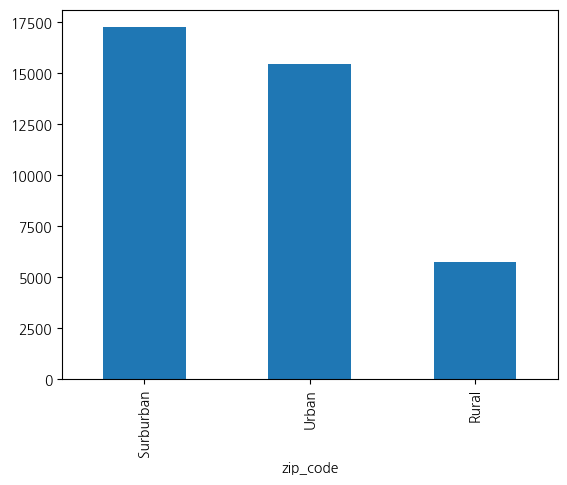

,conversion
zip_code,
Rural,0.189619
Surburban,0.141955
Urban,0.136263


============================== is_referral ==============================


count    38400.000000
mean         0.500130
std          0.500006
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: is_referral, dtype: float64

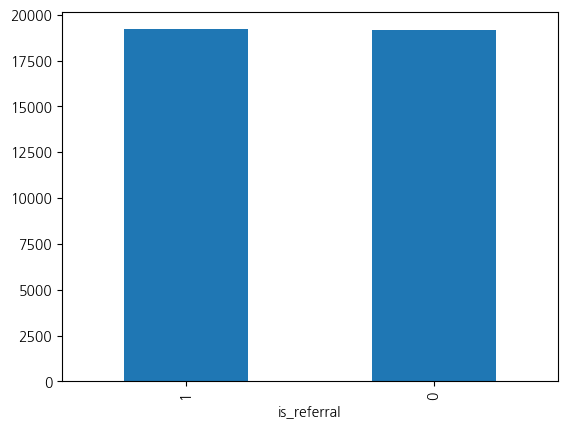

,conversion
is_referral,
0,0.172493
1,0.121062


============================== channel ==============================


count     38400
unique        3
top       Phone
freq      16888
Name: channel, dtype: object

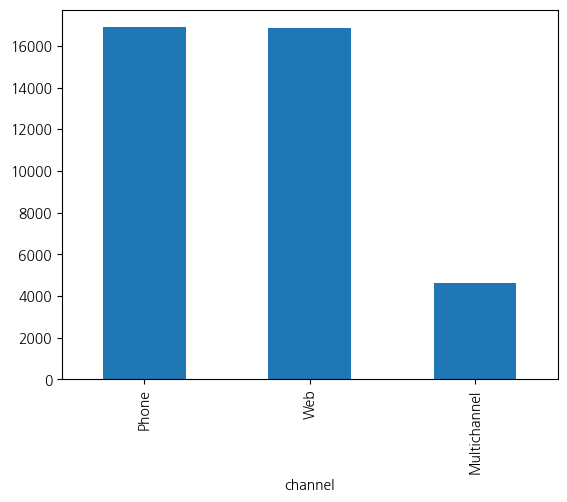

,conversion
channel,
Multichannel,0.174764
Web,0.158719
Phone,0.127132


In [30]:
for col in cat_cols[:-1]:
    print("=" * 30, col, "=" * 30)
    display(mem_train[col].describe(include='all'))
    mem_train[col].value_counts().plot(kind='bar')
    plt.show()
    display(mem_train[[col, 'conversion']].groupby(col).mean().sort_values(by='conversion', ascending=False))

============================== id ==============================


count    118167.000000
mean     549809.088104
std      258979.321858
min      100032.000000
25%      326777.500000
50%      549708.000000
75%      772709.000000
max      999995.000000
Name: id, dtype: float64

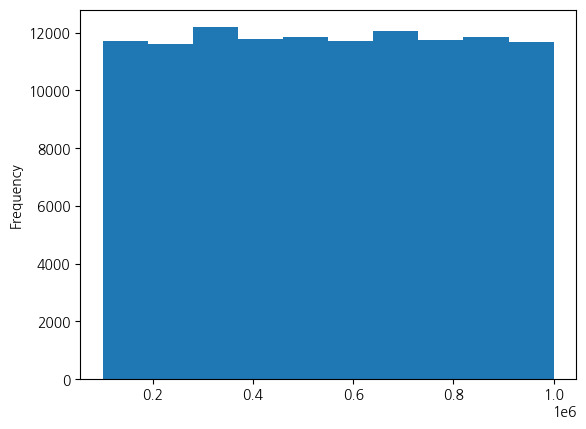

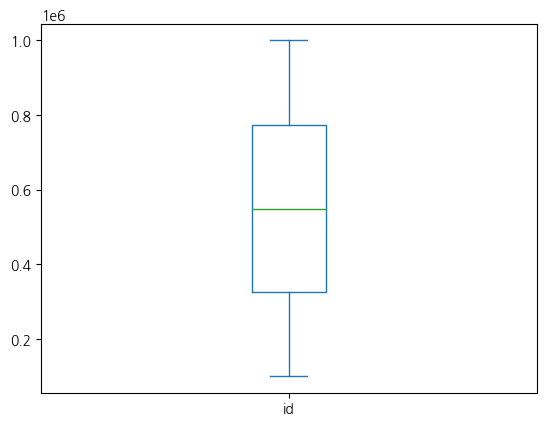

============================== num_item ==============================


count    118167.000000
mean          3.081503
std           1.479529
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: num_item, dtype: float64

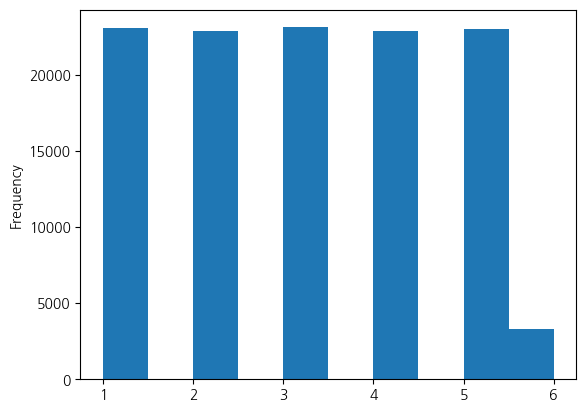

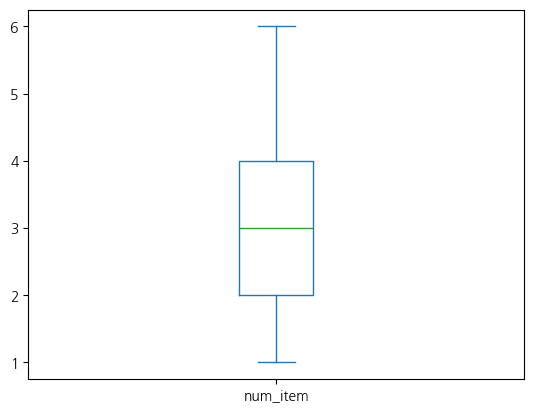

============================== total_amount ==============================


count    118167.000000
mean      21862.034240
std        8216.635961
min        8000.000000
25%       15000.000000
50%       22000.000000
75%       29000.000000
max       38000.000000
Name: total_amount, dtype: float64

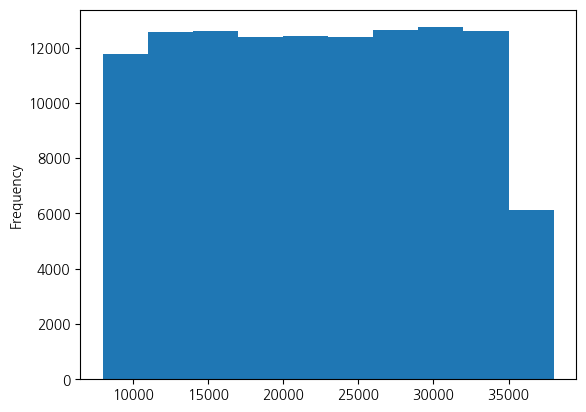

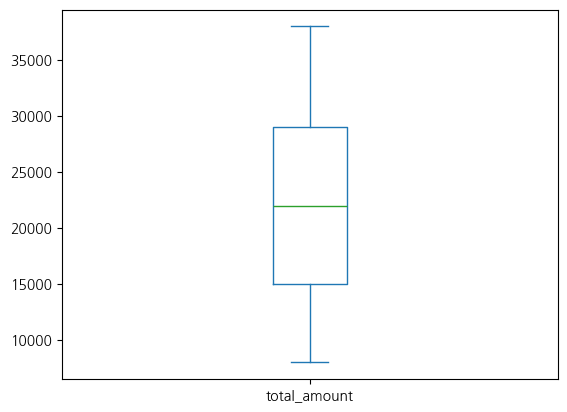

In [31]:
for col in tran_train.columns:
    print("=" * 30, col, "=" * 30)
    display(tran_train[col].describe())
    tran_train[col].plot(kind='hist')
    plt.show()
    tran_train[col].plot(kind='box')
    plt.show()

# tran_train에서 구매빈도, 금액 집계하기

In [32]:
tran_train.head()

,id,num_item,total_amount
0,906145,5,34000
1,906145,1,27000
2,906145,4,33000
3,184478,4,29000
6,130152,2,11000


In [35]:
# 고객 id별 평균 구매 개수와 금액
mean_item_amount = tran_train.groupby('id').mean()
mean_item_amount.columns = ['mean_num_item', 'mean_total_amount']
mean_item_amount

,mean_num_item,mean_total_amount
id,,
100032,2.666667,20666.666667
100036,3.000000,25800.000000
100101,2.666667,22666.666667
100105,4.000000,29000.000000
100113,3.800000,20000.000000
...,...,...
999755,1.000000,10000.000000
999771,4.333333,20000.000000
999911,2.500000,18500.000000


In [38]:
# 고객 id별 평균 구매 빈도
freq = tran_train.groupby('id')[['id']].count()
freq.columns = ['frequency']
freq

,frequency
id,
100032,3
100036,5
100101,3
100105,2
100113,5
...,...
999755,1
999771,3
999911,2


In [39]:
# 고객 id별 총 구매 개수와 총금액
total_item_amount = tran_train.groupby('id').sum()
total_item_amount.columns = ['total_num_item', 'total_total_amount']
total_item_amount

,total_num_item,total_total_amount
id,,
100032,8,62000
100036,15,129000
100101,8,68000
100105,8,58000
100113,19,100000
...,...,...
999755,1,10000
999771,13,60000
999911,5,37000


In [42]:
# id를 기준으로 3개 집계내역 데이터프레임을 1개로 합치기
temp = freq.join(total_item_amount)
groupby_result = temp.join(mean_item_amount)

In [46]:
groupby_result = groupby_result.reset_index()

In [48]:
train_data = pd.merge(mem_train, groupby_result, how='inner', on='id')
train_data

,id,recency,zip_code,is_referral,channel,conversion,frequency,total_num_item,total_total_amount,mean_num_item,mean_total_amount
0,913028,9,Rural,1,Web,0,2,8,30000,4.000000,15000.000000
1,448921,3,Surburban,0,Web,0,5,17,140000,3.400000,28000.000000
2,909398,11,Urban,1,Web,0,4,14,82000,3.500000,20500.000000
3,327583,2,Urban,0,Multichannel,0,3,13,72000,4.333333,24000.000000
4,248352,7,Surburban,0,Web,0,2,2,34000,1.000000,17000.000000
...,...,...,...,...,...,...,...,...,...,...,...
38395,305703,4,Urban,1,Web,0,1,1,9000,1.000000,9000.000000
38396,538867,2,Urban,1,Web,0,2,5,25000,2.500000,12500.000000
38397,608999,1,Surburban,0,Web,0,3,7,62000,2.333333,20666.666667
38398,986281,11,Surburban,1,Web,0,5,16,104000,3.200000,20800.000000


In [49]:
train_data.columns

Index(['id', 'recency', 'zip_code', 'is_referral', 'channel', 'conversion',
       'frequency', 'total_num_item', 'total_total_amount', 'mean_num_item',
       'mean_total_amount'],
      dtype='object')

============================== frequency ==============================


count    38400.000000
mean         3.077266
std          1.384528
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: frequency, dtype: float64

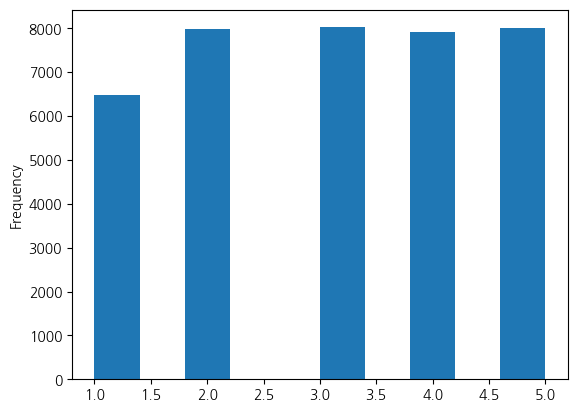

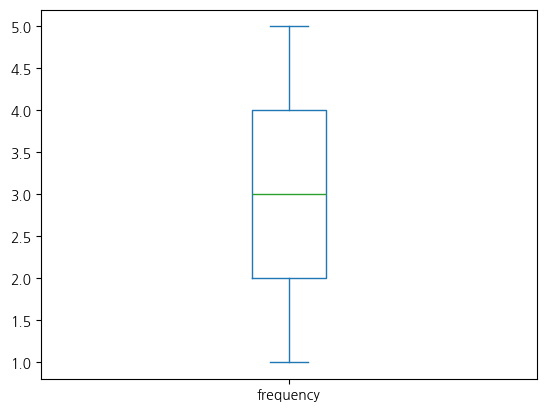

,conversion
frequency,
3,0.182147
5,0.177647
2,0.174169
4,0.172392
1,0.000000


============================== total_num_item ==============================


count    38400.000000
mean         9.482604
std          5.054144
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max         28.000000
Name: total_num_item, dtype: float64

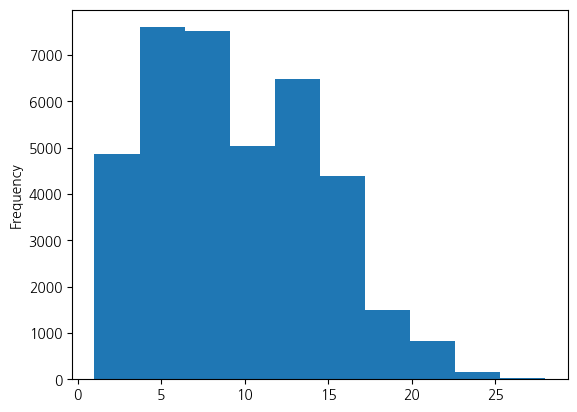

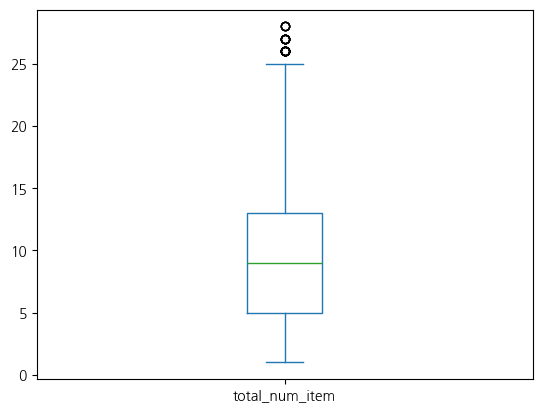

,conversion
total_num_item,
28,1.000000
27,1.000000
26,1.000000
25,1.000000
24,0.772727
23,0.561905
22,0.560694
21,0.440154
20,0.390000


============================== total_total_amount ==============================


count     38400.000000
mean      67275.286458
std       33689.678324
min        8000.000000
25%       39000.000000
50%       66000.000000
75%       93000.000000
max      184000.000000
Name: total_total_amount, dtype: float64

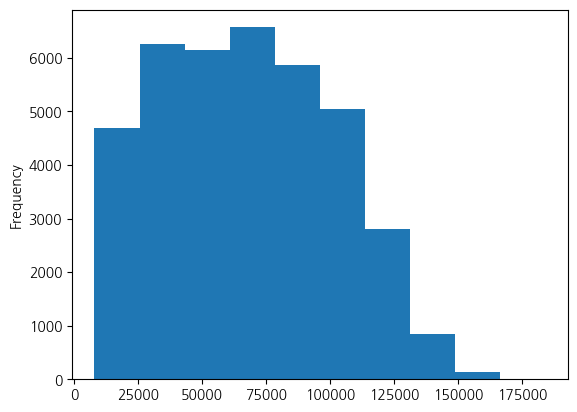

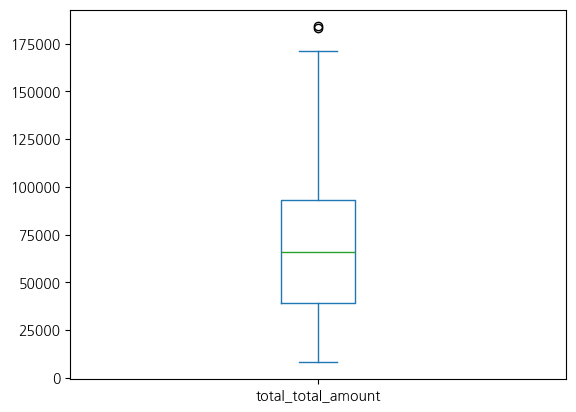

,conversion
total_total_amount,
183000,1.0
164000,1.0
184000,1.0
171000,1.0
162000,1.0
...,...
13000,0.0
12000,0.0
11000,0.0


============================== mean_num_item ==============================


count    38400.000000
mean         3.071370
std          0.974829
min          1.000000
25%          2.500000
50%          3.000000
75%          3.750000
max          6.000000
Name: mean_num_item, dtype: float64

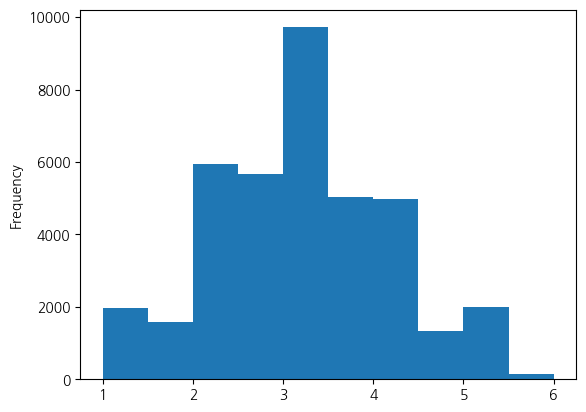

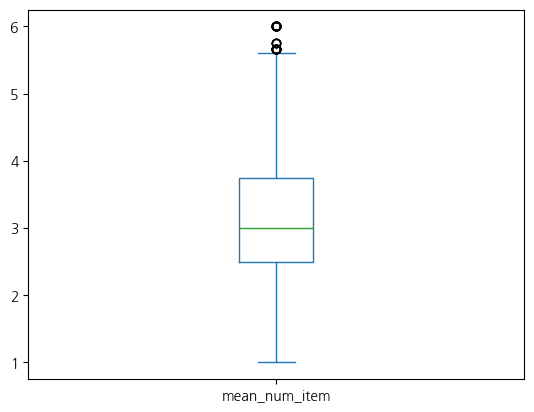

,conversion
mean_num_item,
5.333333,1.000000
5.250000,1.000000
6.000000,1.000000
5.750000,1.000000
5.666667,1.000000
5.600000,1.000000
5.500000,1.000000
5.400000,1.000000
5.200000,1.000000


============================== mean_total_amount ==============================


count    38400.000000
mean     21811.800781
std       5390.194410
min       8000.000000
25%      18333.333333
50%      22000.000000
75%      25333.333333
max      38000.000000
Name: mean_total_amount, dtype: float64

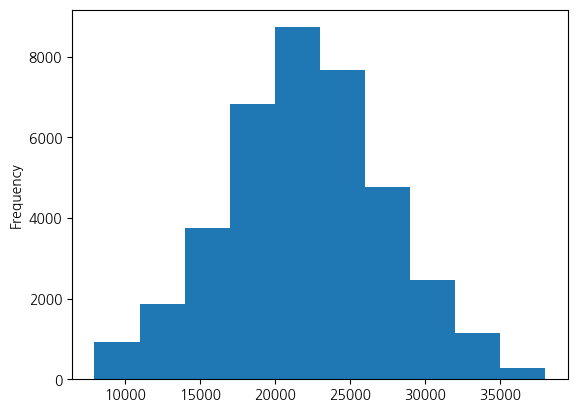

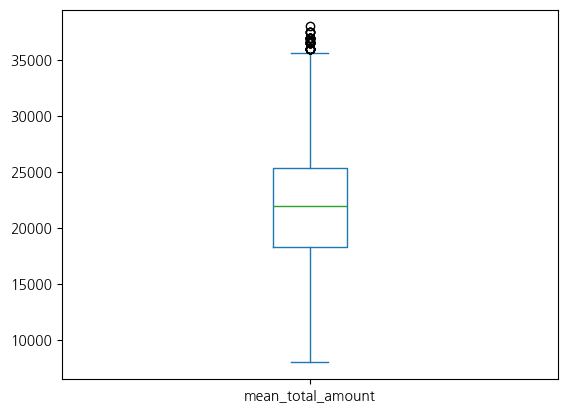

,conversion
mean_total_amount,
38000.000000,1.0
37500.000000,1.0
37000.000000,1.0
32400.000000,1.0
32800.000000,1.0
...,...
11600.000000,0.0
11750.000000,0.0
32600.000000,0.0


In [50]:
new_cols = ['frequency', 'total_num_item', 'total_total_amount', 'mean_num_item','mean_total_amount']
for col in new_cols:
    print("=" * 30, col, "=" * 30)
    display(train_data[col].describe())
    train_data[col].plot(kind='hist')
    plt.show()
    train_data[col].plot(kind='box')
    plt.show()
    display(train_data[[col, 'conversion']].groupby(col).mean().sort_values(by='conversion', ascending=False))

In [51]:
train_data

,id,recency,zip_code,is_referral,channel,conversion,frequency,total_num_item,total_total_amount,mean_num_item,mean_total_amount
0,913028,9,Rural,1,Web,0,2,8,30000,4.000000,15000.000000
1,448921,3,Surburban,0,Web,0,5,17,140000,3.400000,28000.000000
2,909398,11,Urban,1,Web,0,4,14,82000,3.500000,20500.000000
3,327583,2,Urban,0,Multichannel,0,3,13,72000,4.333333,24000.000000
4,248352,7,Surburban,0,Web,0,2,2,34000,1.000000,17000.000000
...,...,...,...,...,...,...,...,...,...,...,...
38395,305703,4,Urban,1,Web,0,1,1,9000,1.000000,9000.000000
38396,538867,2,Urban,1,Web,0,2,5,25000,2.500000,12500.000000
38397,608999,1,Surburban,0,Web,0,3,7,62000,2.333333,20666.666667
38398,986281,11,Surburban,1,Web,0,5,16,104000,3.200000,20800.000000


# 거리기반의 알고리즘을 사용시 독립변수들 간의 단위를 꼭 맞춰 주어야 함
# 스케일링
* MinMaxScaler: 모든 숫자를 0-1사이의 숫자로 변환 - 데이터 분포의 모양을 그대로 유지
* StandardScaler: 평균을 0, 표준편차를 1로 하는 정규분포 형태로 변환 - 데이터의 분포 모양이 정규 분포로 바뀜
* RobustScaler: 사분위수를 이용해서 데이터를 스케일링 - 데이터에 이상값이 있을 때 사용, 이상값에 영향을 최소화

# 머신러닝 모델별 스케일러
* 분류분석
  * knn(최근접이웃): MinMaxScaler, 이상치가 있는 경우 RobustScaler
  * SVM(서포트 벡터 머신): StandardScaler, 이상치가 있는 경우 RobustScaler
  * Logistic Regression: StandardScaler, 이상치가 있는 경우 RobustScaler
  * Naive Bayes: 스케일링 불필요, 이상치가 있는 경우에도 안해도 됨
* 회귀분석
  * Linear / Ridge / Lasso: StandardScaler, 이상치가 있는 경우 RobustScaler
* 군집분석
  * KMeans / DBSCAN: MinMax or StandardScaler, 이상치가 있는 경우 RobustScaler

* Tree계열
  * DecisionTree, RandomForest, XGBoost: 스케일링 불필요, 이상치가 있는 경우에도 안해도 됨

* 인공신경망: MinMax or StandardScaler, 이상치가 있는 경우 RobustScaler

* 수치형: 결측 없음, boxplot상 이상치가 약간 있으나 실제 이상치 아님 standard scaler
* 범주형: 결측 없음, one-hot encoding

In [52]:
X = train_data.drop(['id', 'conversion'], axis=1)
y = train_data['conversion']

In [53]:
X

,recency,zip_code,is_referral,channel,frequency,total_num_item,total_total_amount,mean_num_item,mean_total_amount
0,9,Rural,1,Web,2,8,30000,4.000000,15000.000000
1,3,Surburban,0,Web,5,17,140000,3.400000,28000.000000
2,11,Urban,1,Web,4,14,82000,3.500000,20500.000000
3,2,Urban,0,Multichannel,3,13,72000,4.333333,24000.000000
4,7,Surburban,0,Web,2,2,34000,1.000000,17000.000000
...,...,...,...,...,...,...,...,...,...
38395,4,Urban,1,Web,1,1,9000,1.000000,9000.000000
38396,2,Urban,1,Web,2,5,25000,2.500000,12500.000000
38397,1,Surburban,0,Web,3,7,62000,2.333333,20666.666667
38398,11,Surburban,1,Web,5,16,104000,3.200000,20800.000000


In [56]:
y.value_counts(normalize=True)

conversion
0    0.853229
1    0.146771
Name: proportion, dtype: float64

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 파이프라인으로 컬럼 전처리

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [59]:
X_train.columns

Index(['recency', 'zip_code', 'is_referral', 'channel', 'frequency',
       'total_num_item', 'total_total_amount', 'mean_num_item',
       'mean_total_amount'],
      dtype='object')

In [60]:
num_cols = ['recency', 'frequency', 'total_num_item', 'total_total_amount', 'mean_num_item',
       'mean_total_amount']
cat_cols = ['zip_code', 'is_referral', 'channel']
print(num_cols)
print(cat_cols)

['recency', 'frequency', 'total_num_item', 'total_total_amount', 'mean_num_item', 'mean_total_amount']
['zip_code', 'is_referral', 'channel']


In [62]:
num_pipe = Pipeline(steps=[
    ("std", StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ("ohe", OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocess = ColumnTransformer(transformers=[
    ('nums', num_pipe, num_cols),
    ('cats', cat_pipe, cat_cols)
], remainder='drop')


# 모델 및 하이퍼파라미터 정의 1개만

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [64]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", dtc)
])

pipe.fit(X_train, y_train)
proba = pipe.predict_proba(X_valid)[:, 1]
pred = pipe.predict(X_valid)

print(roc_auc_score(y_valid, proba))
print(classification_report(y_valid, pred))

0.5861252681195754
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6553
           1       0.29      0.29      0.29      1127

    accuracy                           0.79      7680
   macro avg       0.58      0.58      0.58      7680
weighted avg       0.79      0.79      0.79      7680

